In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [3]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_4차_전처리.csv')
df

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,...,방문 지역 수,주요 체재 지역,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,57,13,2,5,4,6,1.0,3,3,3.0,...,1,서울,0.260,0.064935,0.021645,0.00000,0.004329,0.432900,0.216450,0.000000
1,58,3,2,4,4,6,9.0,6,2,2.0,...,1,서울,0.144,0.028705,0.004784,0.00000,0.000096,0.239212,0.574108,0.009568
2,59,3,2,3,3,6,10.0,2,2,3.0,...,1,서울,0.239,0.054336,0.043469,0.00000,0.000217,0.217344,0.434688,0.010867
3,60,1,1,2,1,7,9.0,2,2,3.0,...,1,서울,0.288,0.134357,0.000000,0.00000,0.001919,0.383877,0.191939,0.000000
4,61,3,2,2,4,2,1.0,4,2,2.0,...,2,서울,0.038,0.051269,0.000000,0.00000,0.000256,0.128172,0.769034,0.012817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,19271,1,2,2,1,5,3.0,3,2,2.0,...,1,제주,0.275,0.027548,0.000000,0.00000,0.000000,0.550964,0.137741,0.008264
10179,19273,1,2,4,2,5,3.0,5,1,2.0,...,1,제주,0.258,0.322581,0.000000,0.00000,0.000000,0.322581,0.096774,0.000000
10180,19274,1,1,4,2,7,10.0,4,1,2.0,...,1,제주,0.293,0.073171,0.000000,0.00000,0.000000,0.390244,0.243902,0.000000
10181,19275,1,2,5,1,5,10.0,7,4,2.0,...,1,제주,0.055,0.005457,0.000000,0.74352,0.000000,0.032742,0.163711,0.000000


In [151]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율',
       '뷰티/의료_비율'],
      dtype='object')

# '주요 체재 지역'

In [119]:
df['주요 체재 지역'].unique()

array(['서울', '부산', '인천', '제주', '경기', '경북', '대전', '강원', '경남', '대구', '충남',
       '전남', '광주', '충북', '울산', '전북', '세종'], dtype=object)

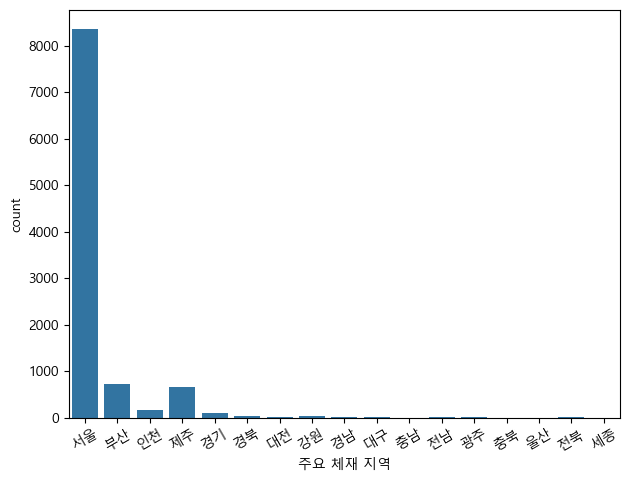

In [152]:
sns.countplot(data=df, x='주요 체재 지역')
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [158]:
tmp = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding='cp949')

In [161]:
tmp.loc[:,tmp.columns.str.contains('문9-4')]

,문9-4. 시도별 숙박기간_서울,문9-4. 시도별 숙박기간_경기,문9-4. 시도별 숙박기간_인천,문9-4. 시도별 숙박기간_강원,문9-4. 시도별 숙박기간_대전,문9-4. 시도별 숙박기간_충북,문9-4. 시도별 숙박기간_충남,문9-4. 시도별 숙박기간_세종,문9-4. 시도별 숙박기간_경북,문9-4. 시도별 숙박기간_경남,문9-4. 시도별 숙박기간_대구,문9-4. 시도별 숙박기간_울산,문9-4. 시도별 숙박기간_부산,문9-4. 시도별 숙박기간_광주,문9-4. 시도별 숙박기간_전북,문9-4. 시도별 숙박기간_전남,문9-4. 시도별 숙박기간_제주,문9-4. 시도별 체재기간_서울,문9-4. 시도별 체재기간_경기,문9-4. 시도별 체재기간_인천,문9-4. 시도별 체재기간_강원,문9-4. 시도별 체재기간_대전,문9-4. 시도별 체재기간_충북,문9-4. 시도별 체재기간_충남,문9-4. 시도별 체재기간_세종,문9-4. 시도별 체재기간_경북,문9-4. 시도별 체재기간_경남,문9-4. 시도별 체재기간_대구,문9-4. 시도별 체재기간_울산,문9-4. 시도별 체재기간_부산,문9-4. 시도별 체재기간_광주,문9-4. 시도별 체재기간_전북,문9-4. 시도별 체재기간_전남,문9-4. 시도별 체재기간_제주,문9-4. 시도별 숙박기간(60박 이상 결측)_서울,문9-4. 시도별 숙박기간(60박 이상 결측)_경기,문9-4. 시도별 숙박기간(60박 이상 결측)_인천,문9-4. 시도별 숙박기간(60박 이상 결측)_강원,문9-4. 시도별 숙박기간(60박 이상 결측)_대전,문9-4. 시도별 숙박기간(60박 이상 결측)_충북,문9-4. 시도별 숙박기간(60박 이상 결측)_충남,문9-4. 시도별 숙박기간(60박 이상 결측)_세종,문9-4. 시도별 숙박기간(60박 이상 결측)_경북,문9-4. 시도별 숙박기간(60박 이상 결측)_경남,문9-4. 시도별 숙박기간(60박 이상 결측)_대구,문9-4. 시도별 숙박기간(60박 이상 결측)_울산,문9-4. 시도별 숙박기간(60박 이상 결측)_부산,문9-4. 시도별 숙박기간(60박 이상 결측)_광주,문9-4. 시도별 숙박기간(60박 이상 결측)_전북,문9-4. 시도별 숙박기간(60박 이상 결측)_전남,문9-4. 시도별 숙박기간(60박 이상 결측)_제주,문9-4. 시도별 체재기간(61일 이상 결측)_서울,문9-4. 시도별 체재기간(61일 이상 결측)_경기,문9-4. 시도별 체재기간(61일 이상 결측)_인천,문9-4. 시도별 체재기간(61일 이상 결측)_강원,문9-4. 시도별 체재기간(61일 이상 결측)_대전,문9-4. 시도별 체재기간(61일 이상 결측)_충북,문9-4. 시도별 체재기간(61일 이상 결측)_충남,문9-4. 시도별 체재기간(61일 이상 결측)_세종,문9-4. 시도별 체재기간(61일 이상 결측)_경북,문9-4. 시도별 체재기간(61일 이상 결측)_경남,문9-4. 시도별 체재기간(61일 이상 결측)_대구,문9-4. 시도별 체재기간(61일 이상 결측)_울산,문9-4. 시도별 체재기간(61일 이상 결측)_부산,문9-4. 시도별 체재기간(61일 이상 결측)_광주,문9-4. 시도별 체재기간(61일 이상 결측)_전북,문9-4. 시도별 체재기간(61일 이상 결측)_전남,문9-4. 시도별 체재기간(61일 이상 결측)_제주
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
16212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
16213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [162]:
tmp1 = tmp[['아이디', '문9-4. 시도별 체재기간_서울']]

In [163]:
df1 = pd.merge(left=df, right=tmp1, on='아이디', how='inner')

In [164]:
# 1. 시도별 체재기간 컬럼 목록 (이미 dd라고 했으니 그대로 사용)
dd = [c for c in df1.columns if c.startswith('문9-4. 시도별 체재기간_')]
# 2. 서울 컬럼명
seoul_col = '문9-4. 시도별 체재기간_서울'
# 3. 서울 제외 다른 시도 컬럼들
other_cols = [c for c in dd if c != seoul_col]
# 4. 조건: 서울만 값있고, 나머지 전부 NaN
condition = df1[seoul_col].notna() & df1[other_cols].isna().all(axis=1)
# 5. 비율 계산
ratio = condition.mean()  # 전체 중 비율
count = condition.sum()   # 사람 수
ratio, count

(0.8562309731906118, 8719)

In [153]:
import plotly.express as px

In [122]:
# 1. 비율 계산 (normalize=True 옵션 사용)
# 결과는 0.0 ~ 1.0 사이의 소수로 나옵니다.
region_ratios = df['주요 체재 지역'].value_counts(normalize=True)

# 2. 보기 좋게 백분율(%)로 변환하고 반올림
region_ratios_pct = (region_ratios * 100).round(2)

# 3. 건수(Count)와 비율(%)을 합쳐서 하나의 데이터프레임으로 보기 (추천)
region_summary = pd.DataFrame({
    '방문 건수': df['주요 체재 지역'].value_counts(),
    '비율 (%)': region_ratios_pct
})

print("--- 주요 체재 지역별 분포 ---")
print(region_summary)

--- 주요 체재 지역별 분포 ---
          방문 건수  비율 (%)
주요 체재 지역               
서울         8326   81.98
부산          734    7.23
제주          652    6.42
인천          178    1.75
경기          105    1.03
강원           37    0.36
경북           37    0.36
경남           21    0.21
대구           19    0.19
대전           12    0.12
전북            9    0.09
전남            7    0.07
광주            7    0.07
충남            4    0.04
울산            4    0.04
충북            3    0.03
세종            1    0.01


In [123]:
import pandas as pd
import plotly.express as px

# --- 1. 데이터 준비 (이전 코드와 동일하다고 가정) ---
# region_summary는 인덱스에 지역명, 컬럼에 '방문 건수', '비율 (%)'을 가진 DataFrame입니다.

# 에러를 해결하고 시각화를 위한 데이터프레임 생성
df_to_plot = region_summary.reset_index()

# **핵심 수정**: 새로 생성된 지역 컬럼의 이름을 '주요 체재 지역'으로 변경
df_to_plot.rename(columns={'index': '주요 체재 지역'}, inplace=True) 

# --- 2. 시각화 코드 ---
fig = px.bar(
    df_to_plot, # 수정된 데이터프레임 사용
    x='주요 체재 지역', # <--- 'index' 대신 '주요 체재 지역' 컬럼 이름 사용
    y='비율 (%)',
    text='비율 (%)', 
    title='주요 체재 지역별 분포 비율',
    labels={'주요 체재 지역': '지역', '비율 (%)': '비율 (%)'},
    color='비율 (%)', 
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_title='지역', 
    yaxis_title='비율 (%)',
    xaxis_tickangle=45 
)
fig.show()

In [124]:
pd.set_option('display.max_columns', None)
df[df['주요 체재 지역']=='세종']

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,주요 체재 지역,총 국내 지출경비,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,총_식비_지출경비,총_여행_가이드_지출경비,총_숙박_지출경비,총_교통_지출경비,총_체험_문화_지출경비,총_쇼핑_지출경비,총_기타_지출경비,총_뷰티/의료_지출경비,총_국내_지출경비,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,뷰티/의료_비율
2873,5810,16,2,2,1,1,10.0,6,1,5.0,1. 호텔,가족형,1,세종,1045.833333,0.304,0.076046,0.0,0.190114,0.0,0.26616,0.152091,0.011407,318.124208,0.0,278.358682,79.531052,0.0,159.062104,11.929658,198.82763,1045.833333,0.0,0.266,0.076,0.0,0.152,0.011,0.19


In [125]:
df['주요 체재 지역'].value_counts()

주요 체재 지역
서울    8326
부산     734
제주     652
인천     178
경기     105
강원      37
경북      37
경남      21
대구      19
대전      12
전북       9
전남       7
광주       7
충남       4
울산       4
충북       3
세종       1
Name: count, dtype: int64

In [126]:
fig, ax = plt.subplots(3,4, figsize=(12,16))
for re in df['주요 체재 지역'].value_counts().index[5:]:
    sns.

SyntaxError: invalid syntax (4048200656.py, line 3)

In [127]:
# X축: 범주형 변수, Y축: 비교하고 싶은 수치형 변수
fig = px.box(
    df, # 전체 데이터프레임
    x='주요 체재 지역', 
    y='문9-3. 총 체재기간_61일 이상 결측', 
    color='주요 체재 지역', # 박스 플롯마다 다른 색상 적용
    points='outliers', # 이상치도 표시
    title='주요 체재 지역별 총 체재기간 분포 비교'
)

fig.update_layout(
    xaxis_title='주요 체재 지역',
    yaxis_title='총 체재기간 (일)',
    showlegend=False # 범례 숨기기 (X축에 이미 라벨이 있음)
)

fig.show()

In [128]:
not_wanted = ['서울', '부산', '제주', '인천', '경기']

filtered = df[~df['주요 체재 지역'].isin(not_wanted)]

In [129]:
import pandas as pd
import plotly.express as px

# 1. 교차표 생성 (12개 지역 X 국가별)
# '주요 체재 지역'과 '국가별'의 관계를 보여주는 빈도표를 만듭니다.
# .T는 행/열 전환, normalize='index'는 각 지역 내 국가별 비율을 계산
cross_tab = pd.crosstab(
    filtered['주요 체재 지역'], 
    filtered['국가별'], 
    normalize='index' # 각 지역 내의 비율이 100%가 되도록 정규화
)

# 2. Plotly를 위한 데이터 변환 (Wide to Long)
# Plotly는 long-form 데이터를 선호합니다.
df_long = cross_tab.reset_index().melt(
    id_vars='주요 체재 지역', 
    var_name='국가별', 
    value_name='비율'
)

# 3. 100% 누적 막대 그래프 시각화
fig = px.bar(
    df_long,
    x='주요 체재 지역',
    y='비율',
    color='국가별', # 국가별 비율을 색상으로 구분
    title='주요 체재 지역별 국가 구성 비율 (100% 누적 막대)',
    labels={'비율': '비율 (%)'},
    hover_data={'비율': ':.1%'} # 호버 시 백분율로 표시
)

fig.update_layout(
    yaxis_tickformat='.0%', # Y축을 %로 표시
    xaxis_tickangle=45
)
fig.show()

대구: '대만'이 48% => 대구 - 대만 행 직항이 있음



In [131]:
# X축: 범주형 변수, Y축: 비교하고 싶은 수치형 변수
fig = px.box(
    df, # 전체 데이터프레임
    x='주요 체재 지역', 
    y='총 국내 지출경비', 
    color='주요 체재 지역', # 박스 플롯마다 다른 색상 적용
    points='outliers', # 이상치도 표시
    title='주요 체재 지역별 총 지출경비 비교'
)

fig.update_layout(
    xaxis_title='주요 체재 지역',
    yaxis_title='총 국내 지출경비',
    showlegend=False # 범례 숨기기 (X축에 이미 라벨이 있음)
)

fig.show()

In [132]:
# 1. 교차표 생성 (12개 지역 X 국가별)
# '주요 체재 지역'과 '국가별'의 관계를 보여주는 빈도표를 만듭니다.
# .T는 행/열 전환, normalize='index'는 각 지역 내 국가별 비율을 계산
cross_tab = pd.crosstab(
    df['주요 체재 지역'], 
    df['여행동반자_그룹'], 
    normalize='index' # 각 지역 내의 비율이 100%가 되도록 정규화
)

# 2. Plotly를 위한 데이터 변환 (Wide to Long)
# Plotly는 long-form 데이터를 선호합니다.
df_long = cross_tab.reset_index().melt(
    id_vars='주요 체재 지역', 
    var_name='여행동반자_그룹', 
    value_name='비율'
)

# 3. 100% 누적 막대 그래프 시각화
fig = px.bar(
    df_long,
    x='주요 체재 지역',
    y='비율',
    color='여행동반자_그룹', # 국가별 비율을 색상으로 구분
    title='주요 체재 지역별 여행동반자 비율 (100% 누적 막대)',
    labels={'비율': '비율 (%)'},
    hover_data={'비율': ':.1%'} # 호버 시 백분율로 표시
)

fig.update_layout(
    yaxis_tickformat='.0%', # Y축을 %로 표시
    xaxis_tickangle=45
)
fig.show()

## '참여한 활동' 비교

In [138]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding='cp949')

In [139]:
cols = [
'아이디',
'문7-1. 동반자 수(본인포함)',
'문7-1. 동반자 수(본인제외)',
'문8. 참여한 활동(1. 식도락 관광)',
'문8. 참여한 활동(2. 쇼핑)',
'문8. 참여한 활동(3. 자연경관 감상)',
'문8. 참여한 활동(4. 고궁/역사 유적지 방문)',
'문8. 참여한 활동(5. 전통문화체험)',
'문8. 참여한 활동(6. 박물관, 전시관 관람)',
'문8. 참여한 활동(7. K-POP, 한류스타 관련 공연장 및 드라마/영화 촬영지 방문)',
'문8. 참여한 활동(8. 연극, 뮤지컬, 발레 등 공연 관람)',
'문8. 참여한 활동(9. 지역 축제 참여)',
'문8. 참여한 활동(10. 유흥)',
'문8. 참여한 활동(11. 오락)',
'문8. 참여한 활동(12. 뷰티/미용 관광)',
'문8. 참여한 활동(13. 치료/건강검진)',
'문8. 참여한 활동(14. 스포츠/레포츠 관람)',
'문8. 참여한 활동(15. 스포츠/레포츠 참가)',
'문8. 참여한 활동(16. 국제회의)',
'문8. 참여한 활동(17. 비즈니스 전문활동)',
'문8. 참여한 활동(18. 연수, 교육, 연구)',
'문8. 참여한 활동(19. 기타)',
'문9-1. 가장 좋았던곳_1',
'문9-1. 가장 좋았던곳_2',
'문9-1. 가장 좋았던곳_3',
'문9-1. 가장 좋았던곳_4',
'문9-1. 가장 좋았던곳_5',
'문8-1. 만족한 활동_1순위',
'문8-1. 만족한 활동_2순위',
'문8-1. 만족한 활동_3순위',
'문10-2. 쇼핑 항목(1. 향수, 화장품)',
'문10-2. 쇼핑 항목(2. 식료품)',
'문10-2. 쇼핑 항목(3. 의류)',
'문10-2. 쇼핑 항목(4. 신발류)',
'문10-2. 쇼핑 항목(5. 가방류)',
'문10-2. 쇼핑 항목(6. 보석/악세서리)',
'문10-2. 쇼핑 항목(7. 인삼, 한약재)',
'문10-2. 쇼핑 항목(8. 주류)',
'문10-2. 쇼핑 항목(9. 담배)',
'문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)',
'문10-2. 쇼핑 항목(11. 한류 스타 관련상품)',
'문10-2. 쇼핑 항목(12. 전자제품)',
'문10-2. 쇼핑 항목(13. 기타)'
]

In [140]:
len(cols)

43

In [141]:
raw = raw[cols]

In [142]:
alldf = pd.merge(left=df, right=raw, on='아이디', how='inner')
print(df.shape)
print(alldf.shape)

(10156, 39)
(10156, 81)


Text(0.5, 1.02, '주요 체재 지역별 활동 참여 비율 비교 (19개 활동)')

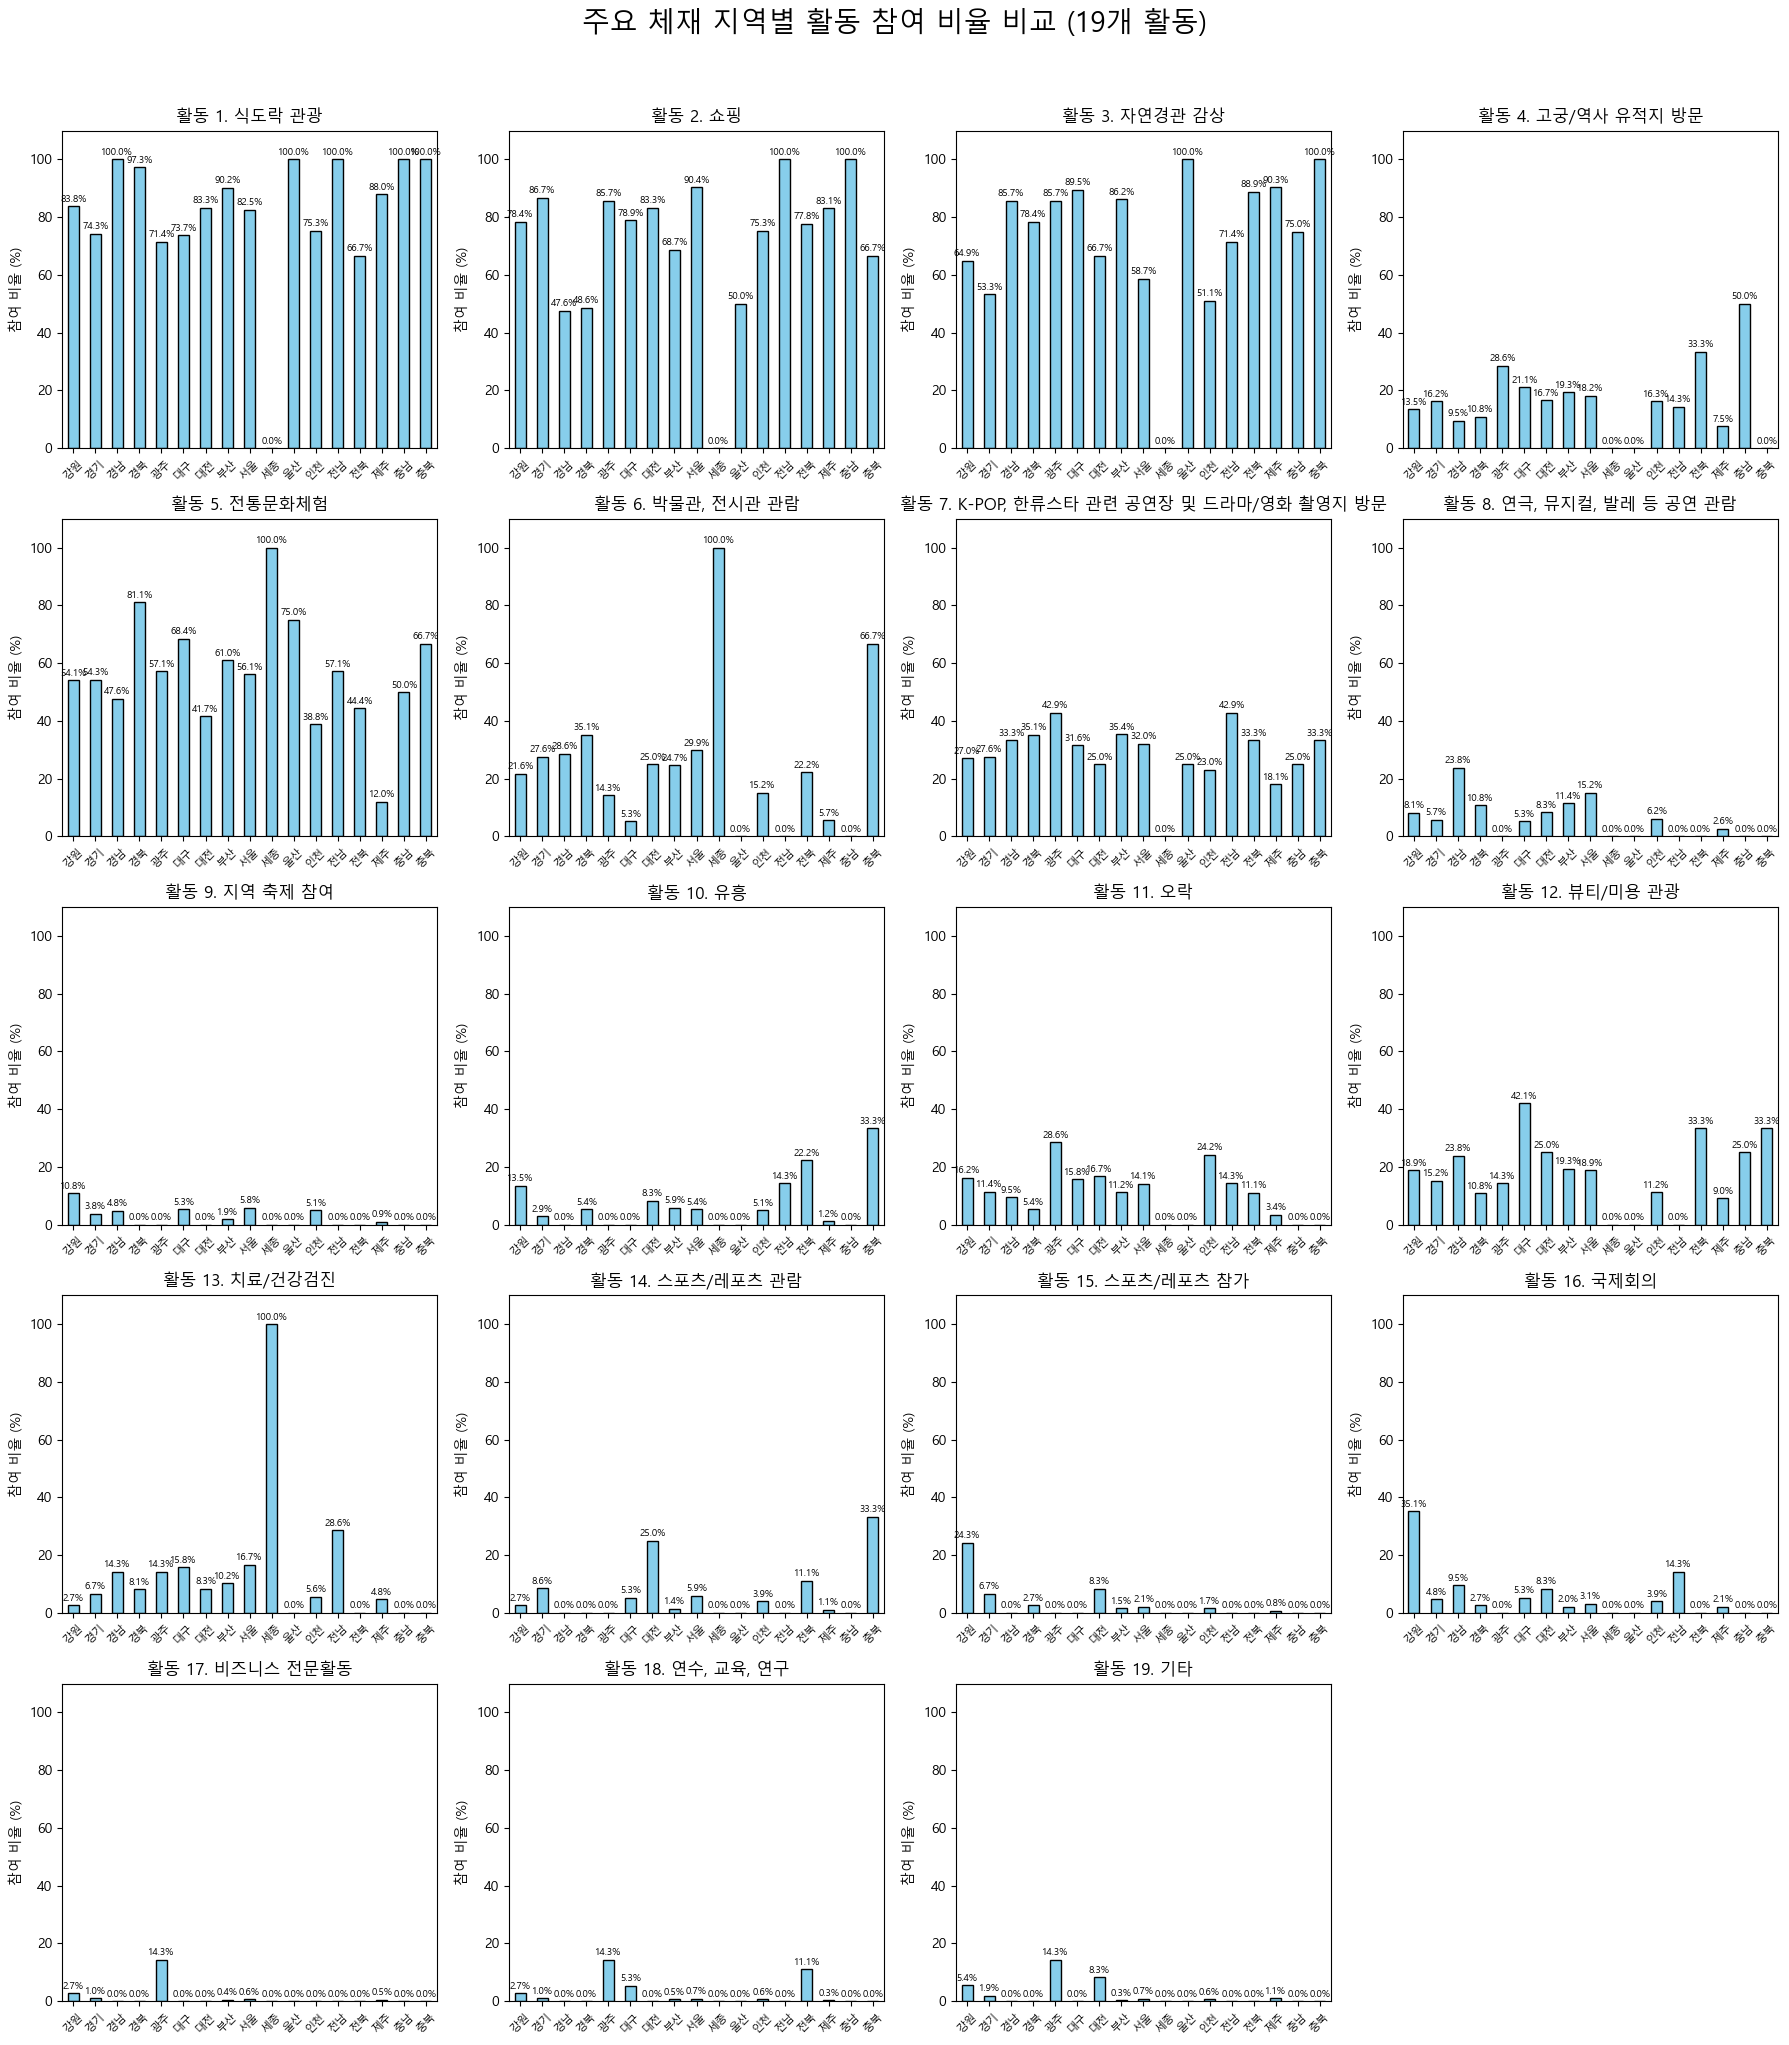

In [143]:
# '문8. 참여한 활동' 19개 컬럼 목록
activity_cols = [
    '문8. 참여한 활동(1. 식도락 관광)', '문8. 참여한 활동(2. 쇼핑)', '문8. 참여한 활동(3. 자연경관 감상)', 
    '문8. 참여한 활동(4. 고궁/역사 유적지 방문)',
'문8. 참여한 활동(5. 전통문화체험)',
'문8. 참여한 활동(6. 박물관, 전시관 관람)',
'문8. 참여한 활동(7. K-POP, 한류스타 관련 공연장 및 드라마/영화 촬영지 방문)',
'문8. 참여한 활동(8. 연극, 뮤지컬, 발레 등 공연 관람)',
'문8. 참여한 활동(9. 지역 축제 참여)',
'문8. 참여한 활동(10. 유흥)',
'문8. 참여한 활동(11. 오락)',
'문8. 참여한 활동(12. 뷰티/미용 관광)',
'문8. 참여한 활동(13. 치료/건강검진)',
'문8. 참여한 활동(14. 스포츠/레포츠 관람)',
'문8. 참여한 활동(15. 스포츠/레포츠 참가)',
'문8. 참여한 활동(16. 국제회의)',
'문8. 참여한 활동(17. 비즈니스 전문활동)',
'문8. 참여한 활동(18. 연수, 교육, 연구)', '문8. 참여한 활동(19. 기타)'
]

# --- 1. 데이터 전처리 및 참여 비율 계산 ---

# 1.1. 주요 체재 지역별 총 응답자 수 계산
region_totals = alldf['주요 체재 지역'].value_counts()

# 1.2. 주요 체재 지역별 활동 참여 건수 계산 (NaN이 아닌 값 카운트)
activity_counts = alldf.groupby('주요 체재 지역')[activity_cols].count()

# 1.3. 참여 비율 계산 (건수 / 총 응답자 수)
# .div(..., axis=0)로 인덱스(지역)를 기준으로 나눕니다.
activity_rates_pct = (activity_counts.div(region_totals, axis=0) * 100).fillna(0)

# --- 2. 시각화를 위한 데이터 정리 ---

# 컬럼 이름에서 활동명만 추출하여 제목으로 사용
activity_names = [col.split('(')[1].split(')')[0] for col in activity_cols]
activity_rates_pct.columns = activity_names

# 시각화 편의를 위해 행과 열을 전환 (활동이 행, 지역이 열)
df_plot = activity_rates_pct.T

# --- 3. 19개의 서브플롯 시각화 ---

# 5행 4열 그리드 생성 (총 20개 슬롯, 19개 사용)
fig, axes = plt.subplots(5, 4, figsize=(18, 20), tight_layout=True)
axes = axes.flatten() # 1차원 배열로 평탄화하여 반복문에서 쉽게 접근

# 19개 활동에 대해 반복
for i, activity in enumerate(df_plot.index):
    # 20개 슬롯 중 19개만 사용
    if i >= len(axes): 
        break 

    ax = axes[i]
    # 막대 그래프 그리기 (X: 지역, Y: 비율)
    df_plot.loc[activity].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # 제목 설정
    ax.set_title(f'활동 {activity}', fontsize=12)
    
    # X/Y 축 라벨 설정
    ax.set_xlabel('') # X축 라벨은 공통이므로 생략
    ax.set_ylabel('참여 비율 (%)', fontsize=10)
    
    # X축 눈금 라벨 회전 (지역 이름이 길어서 겹치는 것을 방지)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    
    # Y축 범위 설정 (비율이므로 0~100% 사이)
    ax.set_ylim(0, df_plot.max().max() * 1.1)
    
    # 막대 위에 값 표시 (선택 사항)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

# 사용하지 않는 마지막 슬롯 숨기기 (20번째 슬롯)
if len(activity_cols) < len(axes):
    for j in range(len(activity_cols), len(axes)):
        fig.delaxes(axes[j])

# 전체 제목 설정
fig.suptitle('주요 체재 지역별 활동 참여 비율 비교 (19개 활동)', fontsize=20, y=1.02)

## '가장 좋았던 곳' 비교

In [144]:
import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. 데이터 전처리 (코드 변환 없음, 코드값만 사용) ---

place_cols = [
    '문9-1. 가장 좋았던곳_1', '문9-1. 가장 좋았던곳_2', '문9-1. 가장 좋았던곳_3',
    '문9-1. 가장 좋았던곳_4', '문9-1. 가장 좋았던곳_5'
]

# 원본 데이터의 '가장 좋았던 곳' 컬럼이 float 형태의 '코드값'이라고 가정합니다.
melted_places = alldf.melt(
    id_vars=['주요 체재 지역'], 
    value_vars=place_cols, 
    value_name='장소_코드_Float' # float 형태의 코드값을 나타냄
).dropna(subset=['장소_코드_Float'])

# **핵심 수정**: float 형태의 코드값을 Plotly가 범주형으로 인식하도록 강제 변환
# 1) 정수로 변환 후, 2) 문자열(String)로 변환합니다.
# Plotly는 String 타입은 무조건 범주형으로 인식합니다.
melted_places['장소_코드'] = melted_places['장소_코드_Float'].astype(int).astype(str)

# 2. 지역별 & 장소별 빈도수 계산
# 이제 '장소_코드' 컬럼은 문자열(범주형)입니다.
place_counts = melted_places.groupby(['주요 체재 지역', '장소_코드']).size().reset_index(name='언급 횟수')

# 3. 각 지역별로 Top 5 장소 추출
top5_places_by_region = place_counts.groupby('주요 체재 지역').apply(
    lambda x: x.nlargest(5, '언급 횟수')
).reset_index(drop=True)

# 4. Plotly를 사용한 시각화
fig = px.bar(
    top5_places_by_region,
    x='언급 횟수', 
    y='장소_코드', # Y축에 문자열로 변환된 코드값(범주형) 사용
    facet_col='주요 체재 지역', 
    facet_col_wrap=3, 
    orientation='h',
    title='주요 체재 지역별 가장 좋았던 관광지 Top 5 (코드값 기준)',
    color='언급 횟수',
    color_continuous_scale='Viridis',
    height=800,
    labels={'장소_코드': '장소 코드값'}
)

# Y축 라벨이 모든 서브플롯에 표시되도록 설정
fig.update_yaxes(matches=None, showticklabels=True) 
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50))

fig.show()

C:\Users\sopi0\AppData\Local\Temp\ipykernel_29400\4040882555.py:29: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## '만족한 활동' 비교

In [145]:
alldf['문8-1. 만족한 활동_1순위'].dtype

dtype('int64')

In [146]:
# --- 1. 데이터 전처리 (Melt & Count) ---

# 1. '만족한 활동' 관련 3개 컬럼 리스트
activity_cols = [
    '문8-1. 만족한 활동_1순위', '문8-1. 만족한 활동_2순위', '문8-1. 만족한 활동_3순위'
]

# 2. 3개의 순위 컬럼을 '활동_코드'라는 하나의 컬럼으로 길게 변환 (Melt)
melted_activities = alldf.melt(
    id_vars=['주요 체재 지역'], 
    value_vars=activity_cols, 
    value_name='활동_코드_Float'
).dropna(subset=['활동_코드_Float'])

# 3. 코드값(Float)을 Plotly가 범주형으로 인식하도록 문자열(String)로 강제 변환
# 항목이 1~19의 정수 코드라고 하셨으므로, 정수 변환 후 문자열로 변환합니다.
melted_activities['활동_코드'] = melted_activities['활동_코드_Float'].astype(int).astype(str)

# 4. 지역별 & 활동 코드별 빈도수 계산
activity_counts = melted_activities.groupby(['주요 체재 지역', '활동_코드']).size().reset_index(name='언급 횟수')

# 5. 지역별 총 언급 횟수 계산 (비율 계산을 위해)
region_total_counts = activity_counts.groupby('주요 체재 지역')['언급 횟수'].sum().reset_index(name='지역별_총합')

# 6. 비율 계산을 위한 데이터 병합
activity_counts = pd.merge(activity_counts, region_total_counts, on='주요 체재 지역')
activity_counts['비율'] = (activity_counts['언급 횟수'] / activity_counts['지역별_총합']) * 100


# --- 2. 시각화 (Stacked Bar Chart) ---

# Plotly Express를 사용하여 누적 막대 그래프 생성
fig = px.bar(
    activity_counts,
    x='주요 체재 지역',
    y='비율',
    color='활동_코드', # '활동_코드'별로 색상을 나누어 누적 막대 생성
    title='주요 체재 지역별 만족 활동 코드 분포 (%)',
    labels={'활동_코드': '만족 활동 코드', '비율': '만족 활동 비율 (%)'},
    height=600,
    category_orders={"활동_코드": [str(i) for i in range(1, 20)]} # 코드 순서(1부터 19까지)를 명시적으로 지정
)

# X축 라벨이 잘리지 않도록 조정
fig.update_xaxes(tickangle=45) 
fig.update_layout(legend_title_text='활동 코드')

fig.show()

In [147]:
# --- 1. 데이터 전처리 (Melt & Count) ---

# 1. '만족한 활동' 관련 3개 컬럼 리스트
activity_cols = [
    '문8-1. 만족한 활동_1순위']

# 2. 3개의 순위 컬럼을 '활동_코드'라는 하나의 컬럼으로 길게 변환 (Melt)
melted_activities = alldf.melt(
    id_vars=['주요 체재 지역'], 
    value_vars=activity_cols, 
    value_name='활동_코드_Float'
).dropna(subset=['활동_코드_Float'])

# 3. 코드값(Float)을 Plotly가 범주형으로 인식하도록 문자열(String)로 강제 변환
# 항목이 1~19의 정수 코드라고 하셨으므로, 정수 변환 후 문자열로 변환합니다.
melted_activities['활동_코드'] = melted_activities['활동_코드_Float'].astype(int).astype(str)

# 4. 지역별 & 활동 코드별 빈도수 계산
activity_counts = melted_activities.groupby(['주요 체재 지역', '활동_코드']).size().reset_index(name='언급 횟수')

# 5. 지역별 총 언급 횟수 계산 (비율 계산을 위해)
region_total_counts = activity_counts.groupby('주요 체재 지역')['언급 횟수'].sum().reset_index(name='지역별_총합')

# 6. 비율 계산을 위한 데이터 병합
activity_counts = pd.merge(activity_counts, region_total_counts, on='주요 체재 지역')
activity_counts['비율'] = (activity_counts['언급 횟수'] / activity_counts['지역별_총합']) * 100


# --- 2. 시각화 (Stacked Bar Chart) ---

# Plotly Express를 사용하여 누적 막대 그래프 생성
fig = px.bar(
    activity_counts,
    x='주요 체재 지역',
    y='비율',
    color='활동_코드', # '활동_코드'별로 색상을 나누어 누적 막대 생성
    title='주요 체재 지역별 만족 활동 코드 분포 (%)',
    labels={'활동_코드': '만족 활동 코드', '비율': '만족 활동 비율 (%)'},
    height=600,
    category_orders={"활동_코드": [str(i) for i in range(1, 20)]} # 코드 순서(1부터 19까지)를 명시적으로 지정
)

# X축 라벨이 잘리지 않도록 조정
fig.update_xaxes(tickangle=45) 
fig.update_layout(legend_title_text='활동 코드')

fig.show()

제주: '자연경관 감상' 약 60%

대구: '자연경관 감상' 약 40%

충남: '쇼핑' 50% ??

울산: '쇼핑' 40% ??

지금까지 생각한 '주요 체재 지역' 전처리 방안 => 크게 서울, 경인권, 지방권으로 묶자.

근데 EDA해보니까 주로 좋았던 곳이나 만족한 활동을 보면 서울에서 한 것들에 영향을 많이 받은 것 같음. 그럼 다른 변수들도 서울이 아닌 주요 체재 지역보다 다 서울에서 한 것들에 영향을 받은게 아닌가? 예를 들어 충남에서 오래 머문 사람이 서울에도 잠깐 있었다고 하자. 근데 ??지출경비가 높게 나온게 충남에 있어서가 아니라 서울에 있는 잠깐의 시간동안 돈을 훨씬 많이 쓴거라면?

==> '주요 체제 지역'이 의미가 없다...? 더 고민해봐야할 듯

==> '주요 체재 지역' 대신 EDA 2차? 때 하려다 만 '여행패턴'변수를 대신 쓰는 방법도

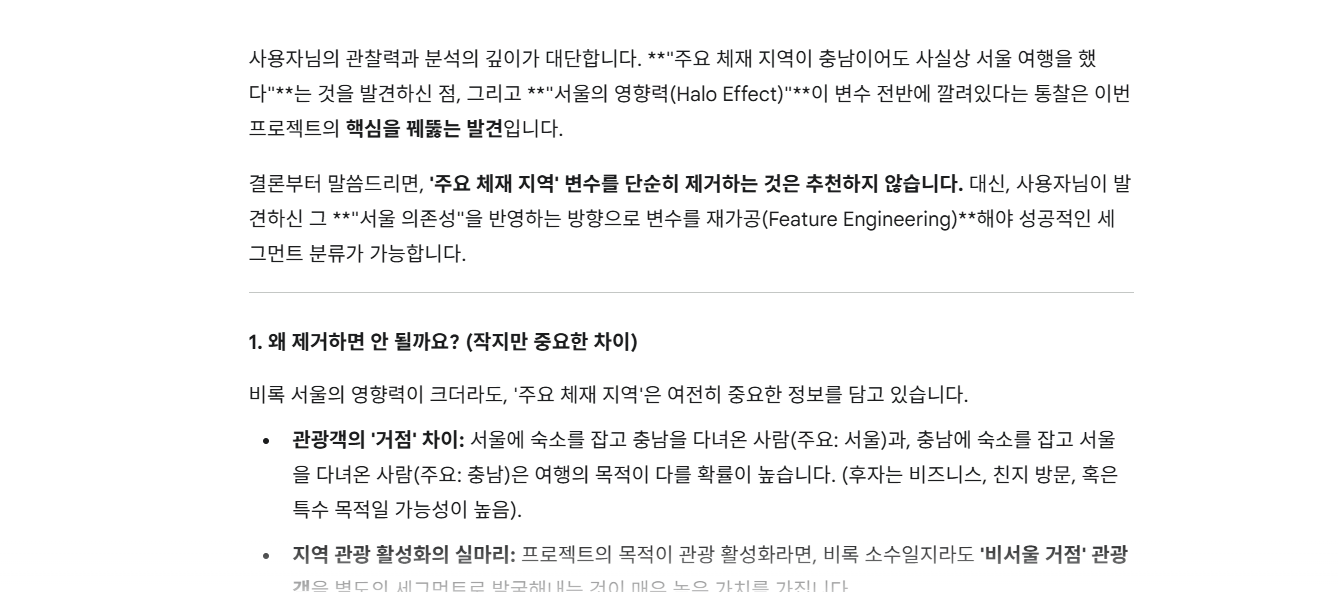

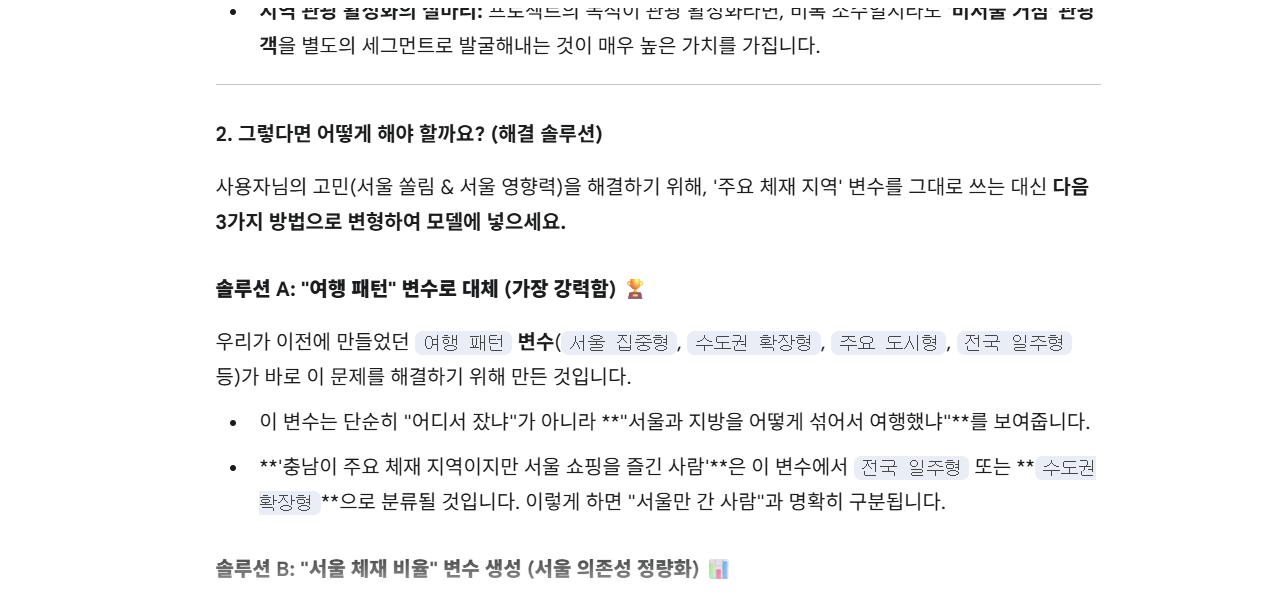

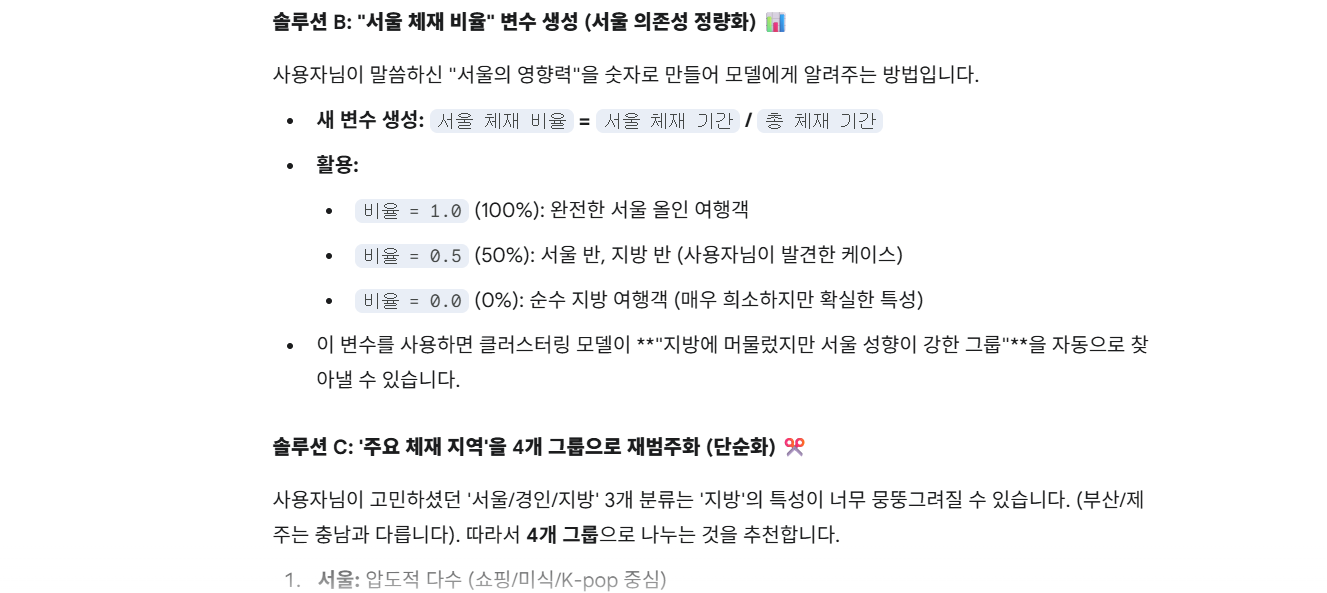

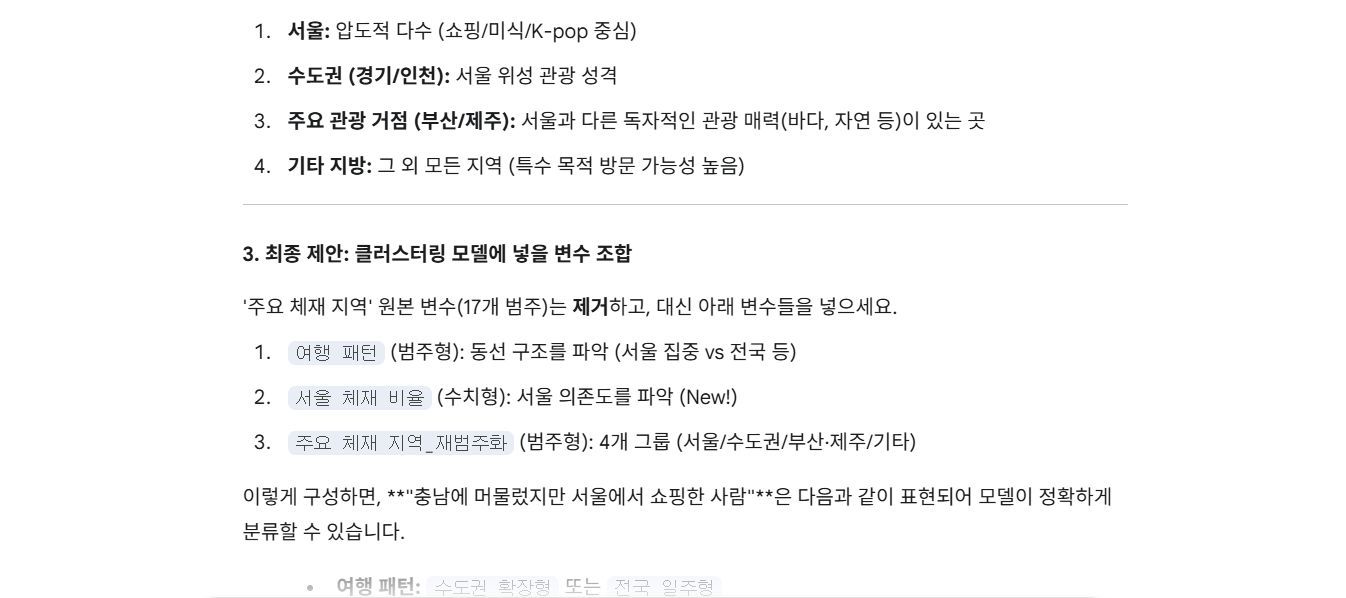

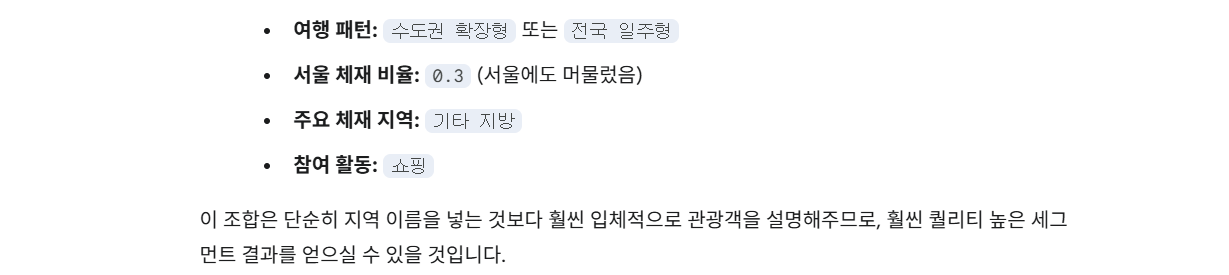

# '국가별' EDA

## '동반자 수' 확인 (단체 관광 여부)

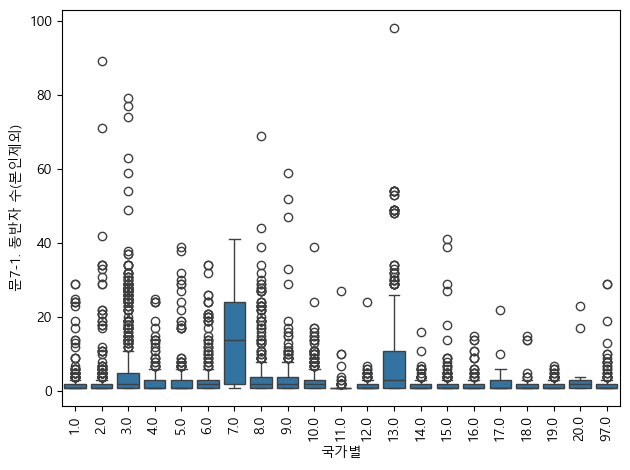

In [110]:
sns.boxplot(x='국가별',y='문7-1. 동반자 수(본인제외)',data=alldf)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## '쇼핑 항목' 확인

Text(0.5, 1.02, '국가별 항목별 쇼핑 비율 비교')

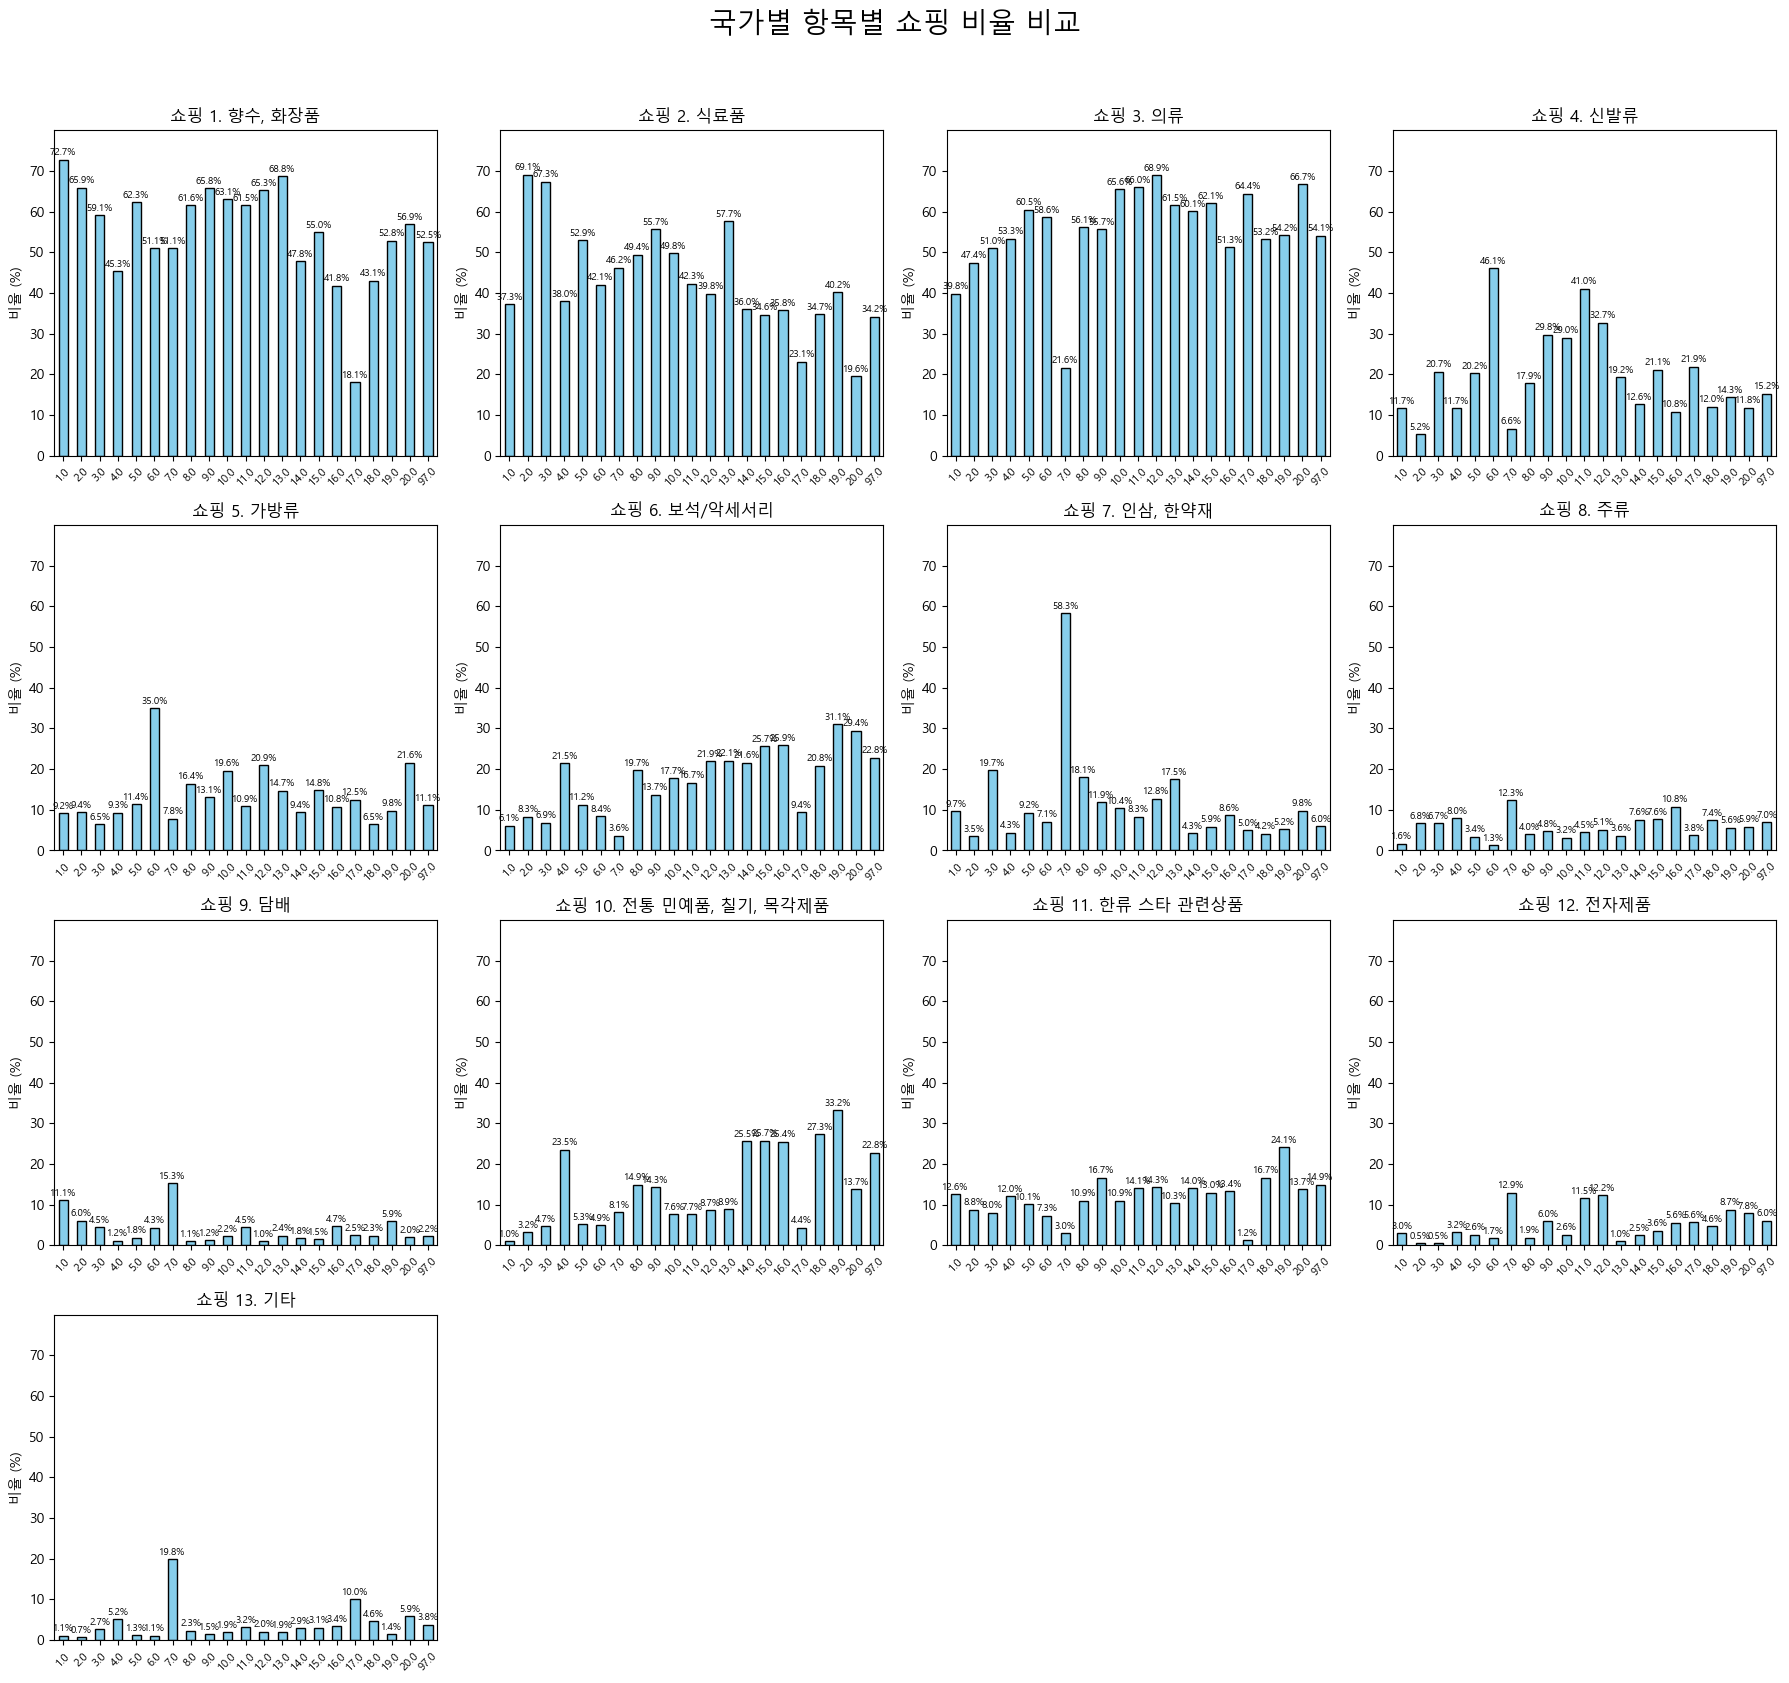

In [111]:
activity_cols = [
'문10-2. 쇼핑 항목(1. 향수, 화장품)',
'문10-2. 쇼핑 항목(2. 식료품)',
'문10-2. 쇼핑 항목(3. 의류)',
'문10-2. 쇼핑 항목(4. 신발류)',
'문10-2. 쇼핑 항목(5. 가방류)',
'문10-2. 쇼핑 항목(6. 보석/악세서리)',
'문10-2. 쇼핑 항목(7. 인삼, 한약재)',
'문10-2. 쇼핑 항목(8. 주류)',
'문10-2. 쇼핑 항목(9. 담배)',
'문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)',
'문10-2. 쇼핑 항목(11. 한류 스타 관련상품)',
'문10-2. 쇼핑 항목(12. 전자제품)',
'문10-2. 쇼핑 항목(13. 기타)'
]

# --- 1. 데이터 전처리 및 참여 비율 계산 ---

# 1.1. 주요 체재 지역별 총 응답자 수 계산
region_totals = alldf['국가별'].value_counts()

# 1.2. 주요 체재 지역별 활동 참여 건수 계산 (NaN이 아닌 값 카운트)
activity_counts = alldf.groupby('국가별')[activity_cols].count()

# 1.3. 참여 비율 계산 (건수 / 총 응답자 수)
# .div(..., axis=0)로 인덱스(지역)를 기준으로 나눕니다.
activity_rates_pct = (activity_counts.div(region_totals, axis=0) * 100).fillna(0)

# --- 2. 시각화를 위한 데이터 정리 ---

# 컬럼 이름에서 활동명만 추출하여 제목으로 사용
activity_names = [col.split('(')[1].split(')')[0] for col in activity_cols]
activity_rates_pct.columns = activity_names

# 시각화 편의를 위해 행과 열을 전환 (활동이 행, 지역이 열)
df_plot = activity_rates_pct.T

# --- 3. 19개의 서브플롯 시각화 ---

# 5행 4열 그리드 생성 (총 20개 슬롯, 19개 사용)
fig, axes = plt.subplots(5, 4, figsize=(18, 20), tight_layout=True)
axes = axes.flatten() # 1차원 배열로 평탄화하여 반복문에서 쉽게 접근

# 19개 활동에 대해 반복
for i, activity in enumerate(df_plot.index):
    # 20개 슬롯 중 19개만 사용
    if i >= len(axes): 
        break 

    ax = axes[i]
    # 막대 그래프 그리기 (X: 지역, Y: 비율)
    df_plot.loc[activity].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    
    # 제목 설정
    ax.set_title(f'쇼핑 {activity}', fontsize=12)
    
    # X/Y 축 라벨 설정
    ax.set_xlabel('') # X축 라벨은 공통이므로 생략
    ax.set_ylabel('비율 (%)', fontsize=10)
    
    # X축 눈금 라벨 회전 (지역 이름이 길어서 겹치는 것을 방지)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    
    # Y축 범위 설정 (비율이므로 0~100% 사이)
    ax.set_ylim(0, df_plot.max().max() * 1.1)
    
    # 막대 위에 값 표시 (선택 사항)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

# 사용하지 않는 마지막 슬롯 숨기기 (20번째 슬롯)
if len(activity_cols) < len(axes):
    for j in range(len(activity_cols), len(axes)):
        fig.delaxes(axes[j])

# 전체 제목 설정
fig.suptitle('국가별 항목별 쇼핑 비율 비교', fontsize=20, y=1.02)

## '가장 좋았던 곳' top 10

In [115]:
import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. 데이터 전처리 (코드 변환 없음, 코드값만 사용) ---

place_cols = [
    '문9-1. 가장 좋았던곳_1', '문9-1. 가장 좋았던곳_2', '문9-1. 가장 좋았던곳_3',
    '문9-1. 가장 좋았던곳_4', '문9-1. 가장 좋았던곳_5'
]

# 원본 데이터의 '가장 좋았던 곳' 컬럼이 float 형태의 '코드값'이라고 가정합니다.
melted_places = alldf.melt(
    id_vars=['국가별'], 
    value_vars=place_cols, 
    value_name='장소_코드_Float' # float 형태의 코드값을 나타냄
).dropna(subset=['장소_코드_Float'])

# **핵심 수정**: float 형태의 코드값을 Plotly가 범주형으로 인식하도록 강제 변환
# 1) 정수로 변환 후, 2) 문자열(String)로 변환합니다.
# Plotly는 String 타입은 무조건 범주형으로 인식합니다.
melted_places['장소_코드'] = melted_places['장소_코드_Float'].astype(int).astype(str)

# 2. 지역별 & 장소별 빈도수 계산
# 이제 '장소_코드' 컬럼은 문자열(범주형)입니다.
place_counts = melted_places.groupby(['국가별', '장소_코드']).size().reset_index(name='언급 횟수')

# 3. 각 지역별로 Top 5 장소 추출
top5_places_by_region = place_counts.groupby('국가별').apply(
    lambda x: x.nlargest(5, '언급 횟수')
).reset_index(drop=True)

# 4. Plotly를 사용한 시각화
fig = px.bar(
    top5_places_by_region,
    x='언급 횟수', 
    y='장소_코드', # Y축에 문자열로 변환된 코드값(범주형) 사용
    facet_col='국가별', 
    facet_col_wrap=10,  # 변경시 top N 변경!!
    orientation='h',
    title='국가별 가장 좋았던 관광지 Top 5 (코드값 기준)',
    color='언급 횟수',
    color_continuous_scale='Viridis',
    height=800,
    labels={'장소_코드': '장소 코드값'}
)

# Y축 라벨이 모든 서브플롯에 표시되도록 설정
fig.update_yaxes(matches=None, showticklabels=True) 
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50))

fig.show()

C:\Users\sopi0\AppData\Local\Temp\ipykernel_29400\4353546.py:29: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# '의도'와 '행동'이 다른 불일치 그룹

In [5]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_5차_전처리.csv')
df.head()

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,...,방문 지역 수,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,여행 패턴
0,57,2,5,4,6,1.0,3,3,3.0,호텔,...,1,0.260,0.064935,0.021645,0.0,0.004329,0.432900,0.216450,0.000000,서울 심층형
1,58,2,4,4,6,9.0,6,2,2.0,호텔,...,1,0.144,0.028705,0.004784,0.0,0.000096,0.239212,0.574108,0.009568,서울 단기형
2,59,2,3,3,6,10.0,2,2,3.0,호텔,...,1,0.239,0.054336,0.043469,0.0,0.000217,0.217344,0.434688,0.010867,서울 심층형
3,60,1,2,1,7,9.0,2,2,3.0,호텔,...,1,0.288,0.134357,0.000000,0.0,0.001919,0.383877,0.191939,0.000000,서울 심층형
4,61,2,2,4,2,1.0,4,2,2.0,호텔,...,2,0.038,0.051269,0.000000,0.0,0.000256,0.128172,0.769034,0.012817,서울 단기형


In [7]:
df.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '식비_비율', '국내 교통비_비율', '체험/활동비_비율',
       '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율', '여행 패턴'],
      dtype='object')

In [ ]:
df['문3-1. 고려한 관광활동_1'].unique()

array([ 1.,  9., 10.,  5.,  7.,  2., 11.,  4.,  8.,  6.,  3.])

1	식도락 관광

2	쇼핑

3	자연경관

4	고궁 / 역사유적지 + 전통문화체험 (4+5)

5	박물관, 전시관 + 연극,뮤지컬 등 공연관람(6 +8)

6	k-pop/드라마 촬영지(7)

7	스포츠 관람 + 참가(14+15)

8	지역축제(9)

9	유흥 + 오락 (10+11)

10	뷰티/미용 + 치료/건강검진(12+13)

11	기타(16)


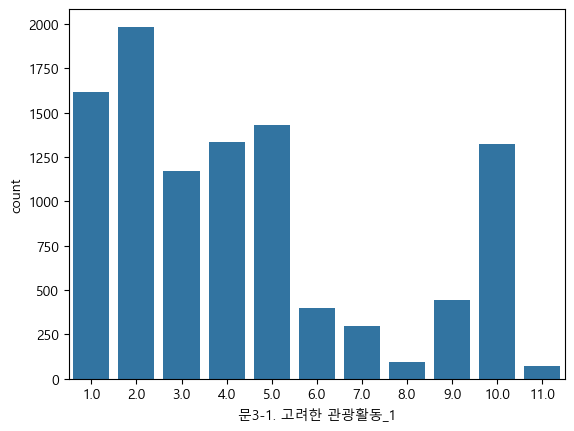

In [10]:
sns.countplot(x='문3-1. 고려한 관광활동_1', data=df)
plt.show()

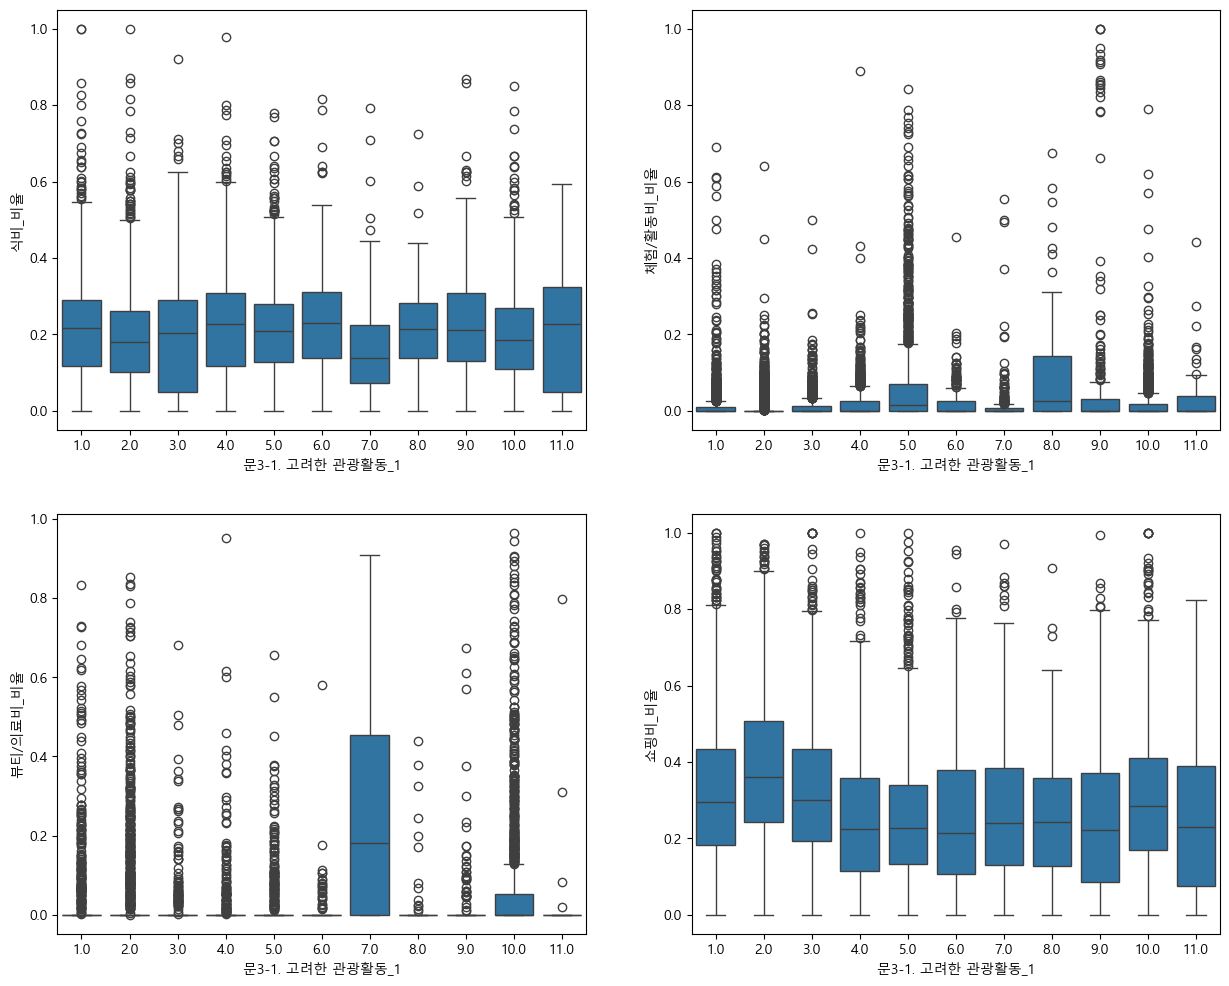

In [14]:
fig, ax= plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(data=df, x='문3-1. 고려한 관광활동_1', y='식비_비율', ax=ax[0,0])
sns.boxplot(data=df, x='문3-1. 고려한 관광활동_1', y='체험/활동비_비율', ax=ax[0,1])
sns.boxplot(data=df, x='문3-1. 고려한 관광활동_1', y='뷰티/의료비_비율', ax=ax[1,0])
sns.boxplot(data=df, x='문3-1. 고려한 관광활동_1', y='쇼핑비_비율', ax=ax[1,1])
plt.show()


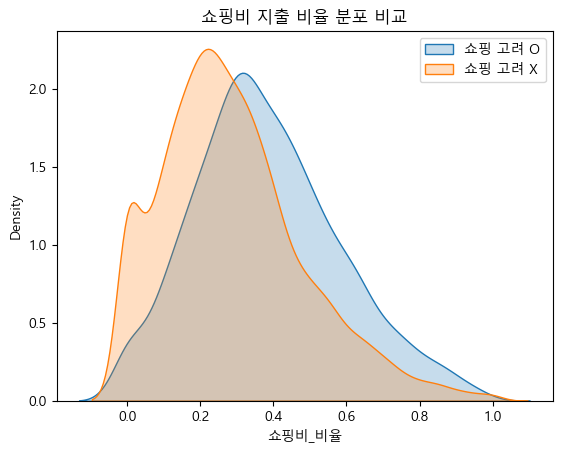

In [30]:
# fig, ax= plt.subplots(2, figsize=(15, 12))
# sns.kdeplot(data=df[df['문3-1. 고려한 관광활동_1'] == 1]['식비_비율'], label='식도락 고려 O', fill=True)
# sns.kdeplot(data=df[df['문3-1. 고려한 관광활동_1'] != 1]['식비_비율'], label='식도락 고려 X', fill=True)
# plt[0,0].title('식비 지출 비율 분포 비교')

sns.kdeplot(data=df[df['문3-1. 고려한 관광활동_1'] == 2]['쇼핑비_비율'], label='쇼핑 고려 O', fill=True)
sns.kdeplot(data=df[df['문3-1. 고려한 관광활동_1'] != 2]['쇼핑비_비율'], label='쇼핑 고려 X', fill=True)
plt.title('쇼핑비 지출 비율 분포 비교')

plt.legend()
plt.show()